# example 

> example of using streamlit in a jupyter notebook

[![Streamlit App](https://static.streamlit.io/badges/streamlit_badge_black_white.svg)](https://ddobrinskiy-jupyter.streamlit.app/)


In this examle we use [nbdev](https://nbdev.fast.ai/) to export only the relevant cells of our notebook to `.py` file

- start the cells you want exported with the `#|export` or `#|exporti` directive

- run `nb_export` to convert the `.ipynb` to `.py`

```python
from nbdev.export import nb_export
nb_export('99_example.ipynb', lib_path='.', name='example')
```

Alternatively you can use native `nbconvert` from bash, but nbdev is superior :)

In [ ]:
!pip install streamlit_jupyter

In [ ]:
%load_ext autoreload

%autoreload 2

In [ ]:
# |exporti

from datetime import datetime

import streamlit as st

from streamlit_jupyter import StreamlitPatcher, tqdm

In [ ]:
sp = StreamlitPatcher()
sp.jupyter()  # register patcher with streamlit

In [ ]:
# |exporti

st.title("Example")

# Example

In [ ]:
# |exporti

st.markdown(
    """

This is a test page demonstrating the use of `streamlit_jupyter`.

If you're seeing this in jupyter, then it's working!

"""
)



This is a test page demonstrating the use of `streamlit_jupyter`.

If you're seeing this in jupyter, then it's working!



In [ ]:
sp.registered_methods

{'cache',
 'cache_data',
 'cache_resource',
 'caption',
 'checkbox',
 'code',
 'data_editor',
 'dataframe',
 'date_input',
 'expander',
 'header',
 'json',
 'latex',
 'markdown',
 'metric',
 'multiselect',
 'radio',
 'selectbox',
 'subheader',
 'text',
 'text_area',
 'text_input',
 'title',
 'write'}

In [ ]:
# |exporti

name = st.text_input("What's your name?", "John")

Textarea(value='John', description="What's your name?", placeholder='Type something')

In [ ]:
# |exporti

date = st.date_input("Choose a date", datetime.now().date())

DatePicker(value=Timestamp('2025-11-06 00:00:00'), description='Choose a date', step=1)

In [ ]:
# |exporti

st.markdown(f"## Hello {name}!\n## The date is {date.strftime('%Y-%m-%d')}")

## Hello John!
## The date is 2025-11-06

In [ ]:
# |exporti

import time

import pandas as pd

st.subheader("A cached dataframe")


@st.cache_data()
def get_data(date):
    for i in tqdm(range(10)):
        time.sleep(0.1)
    return pd.DataFrame(
        {"date": pd.date_range(date, periods=3), "c": [7, 8, 5], "d": [10, 11, 7]}
    ).set_index("date")


df = get_data(date)
st.write(df)

### A cached dataframe

  0%|          | 0/10 [00:00<?, ?it/s]

,c,d
date,,
2025-11-06,7,10
2025-11-07,8,11
2025-11-08,5,7


In [ ]:
# |exporti

st.subheader("Data Editor")
df = pd.DataFrame(
    [
        {
            "command": "st.selectbox",
            "rating": 4,
            "is_widget": True,
        },
        {
            "command": "st.balloons",
            "rating": 5,
            "is_widget": False,
        },
        {
            "command": "st.time_input",
            "rating": 3,
            "is_widget": True,
        },
    ]
)
edited_df = st.data_editor(df)

### Data Editor

,command,rating,is_widget
0,st.selectbox,4,True
1,st.balloons,5,False
2,st.time_input,3,True


In [ ]:
# |exporti


st.subheader("One more cache example")


@st.cache_resource(ttl=3600)
def get_resource():
    st.write("Getting resource...")
    for i in tqdm(range(5)):
        time.sleep(0.1)
    return {
        "foo": "bar",
        "baz": [1, 2, 3],
        "qux": {"a": 1, "b": 2, "c": 3},
    }


records = get_resource()
st.json(records)

### One more cache example

Getting resource...

  0%|          | 0/5 [00:00<?, ?it/s]

```json
{
  "foo": "bar",
  "baz": [
    1,
    2,
    3
  ],
  "qux": {
    "a": 1,
    "b": 2,
    "c": 3
  }
}
```

### Ploting

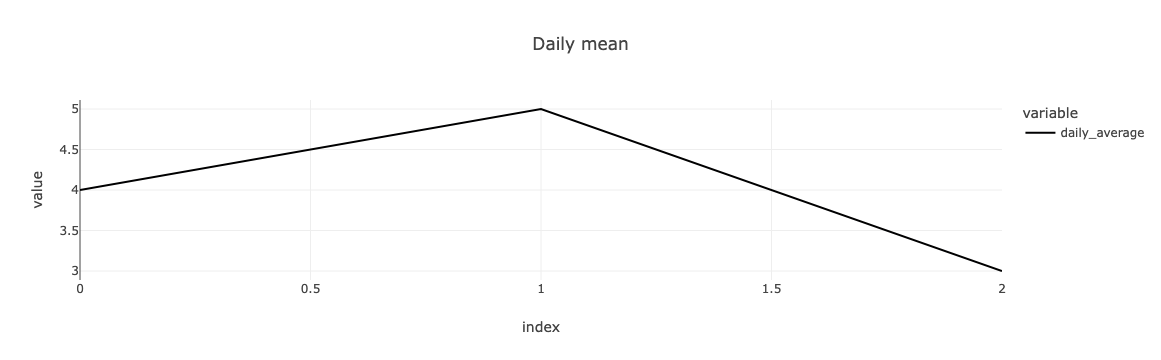

In [ ]:
# |exporti

st.subheader("Ploting")

import plotly.express as px

df_daily = df[["rating"]].mean(axis="columns").rename("daily_average")
fig = px.line(df_daily, title="Daily mean", width=600)
st.write(fig)

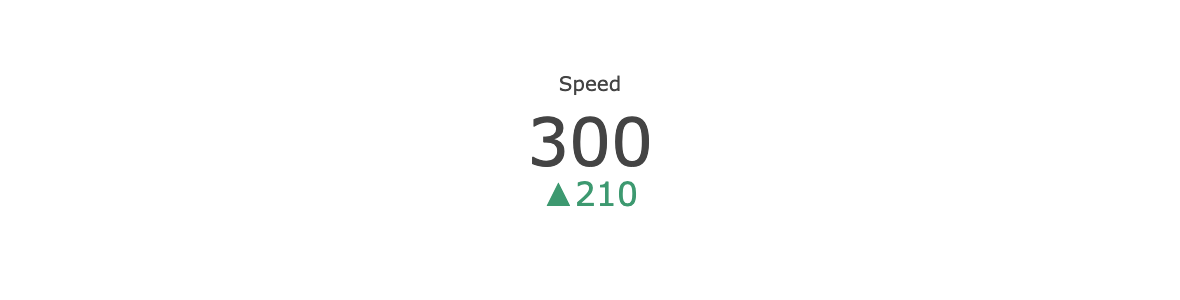

In [ ]:
# | exporti

st.metric("Speed", 300, 210, delta_color="normal", label_visibility="visible")

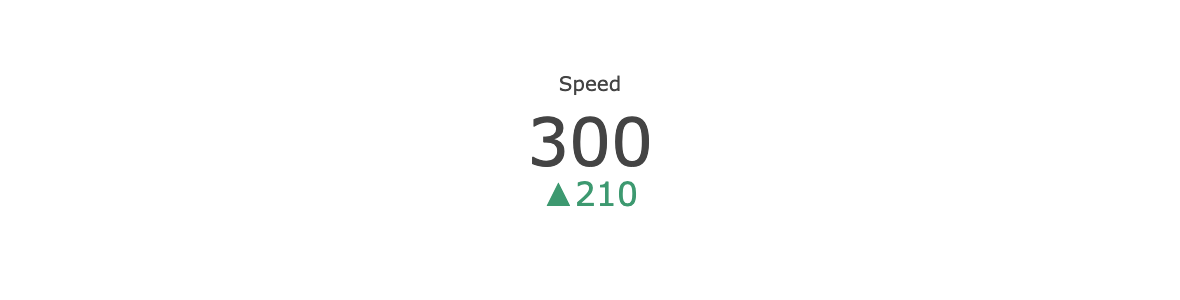

In [ ]:
# | exporti

st.metric("Speed", 300, 210)

In [ ]:
# |exporti

st.code("print(1+1)", language="python")

```python
print(1+1)
```

In [ ]:
# |exporti

show_code = st.checkbox("Show code", value=True)

Checkbox(value=True, description='Show code', indent=False)

In [ ]:
# |exporti

if show_code:
    st.code("[i**2 for i in range(100)]")

```python
[i**2 for i in range(100)]
```

In [ ]:
# |exporti

option = st.radio("Choose one option", options=["foo", "bar"], index=1)

RadioButtons(description='Choose one option', index=1, options=('foo', 'bar'), value='bar')

In [ ]:
# |exporti

option = st.selectbox("Selectbox: ", options=["Jane", "Bob", "Alice"], index=0)

Dropdown(description='Selectbox: ', options=('Jane', 'Bob', 'Alice'), value='Jane')

In [ ]:
# |exporti

options = st.multiselect("Multiselect: ", options=["python", "golang", "julia", "rust"])

SelectMultiple(description='Multiselect: ', options=('python', 'golang', 'julia', 'rust'), value=())

In [ ]:
# |exporti

options = st.multiselect(
    "Multiselect with defaults: ",
    options=["nbdev", "streamlit", "jupyter", "fastcore"],
    default=["jupyter", "streamlit"],
)

SelectMultiple(description='Multiselect with defaults: ', index=(2, 1), options=('nbdev', 'streamlit', 'jupyte…

In [ ]:
# | exporti
st.subheader("st.text:")
st.text("This is a text")
st.text("This is \n multiline text")
st.code("This is multiline \n code", language=None)

### st.text:

```None
This is a text
```

```None
This is 
 multiline text
```

```None
This is multiline 
 code
```

In [ ]:
# from nbdev.export import nb_export

# nb_export("99_example.ipynb", lib_path="./", name="example")

In [ ]:
# !nbdev_docs

In [ ]:
# !streamlit run example.py

In [ ]:
# !jupyter nbconvert --to html "99_example.ipynb"